In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#1
df=sns.load_dataset("penguins")
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [2]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (344, 7)


In [3]:
#2
print("\n Coloumn name :\n")
print(df.dtypes)



 Coloumn name :

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [4]:
#missing values
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [5]:
print("\n Summary Statistics:\n")
print(df.describe())


 Summary Statistics:

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [6]:

print("\n Unique values in categorical columns:\n")

for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


 Unique values in categorical columns:

species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['Male' 'Female' nan]


In [7]:
# EDA
numerical_cols=df.select_dtypes(include=[np.number]).columns
categorical_cols=df.select_dtypes(include=['object']).columns

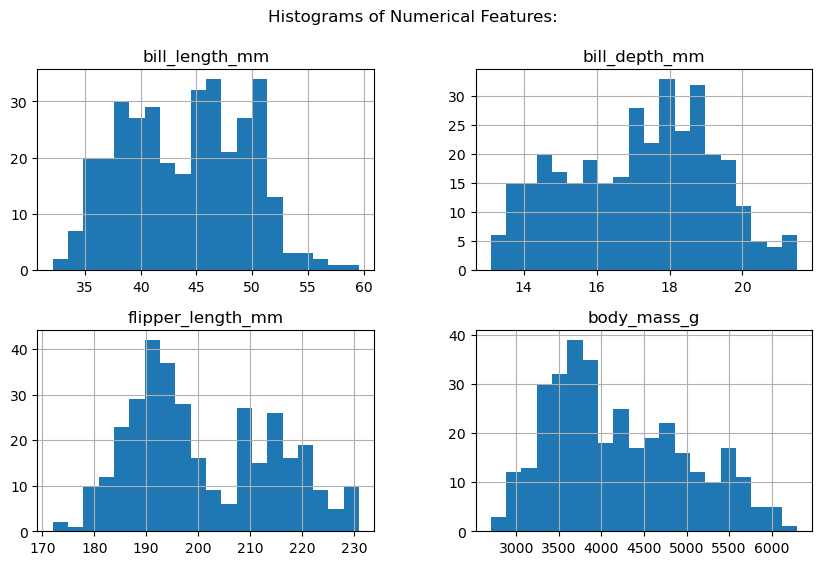

In [8]:
#histograms
import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(10,6),bins=20)
plt.suptitle("Histograms of Numerical Features:")
plt.show()

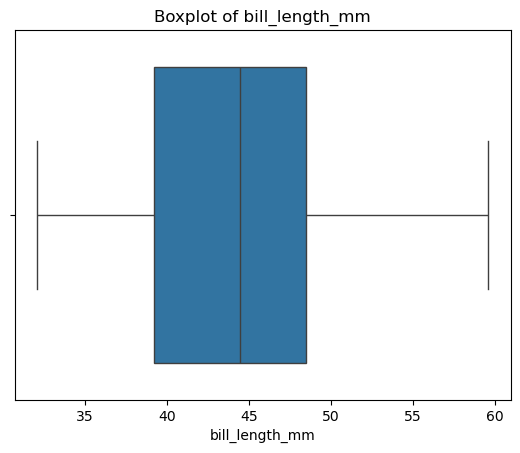

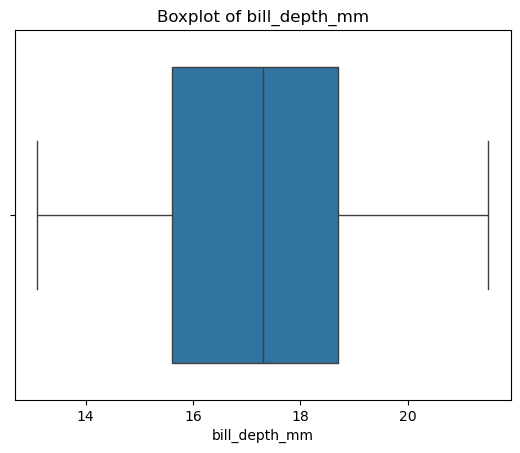

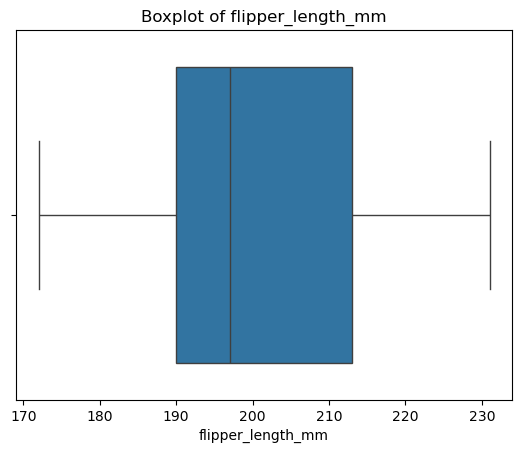

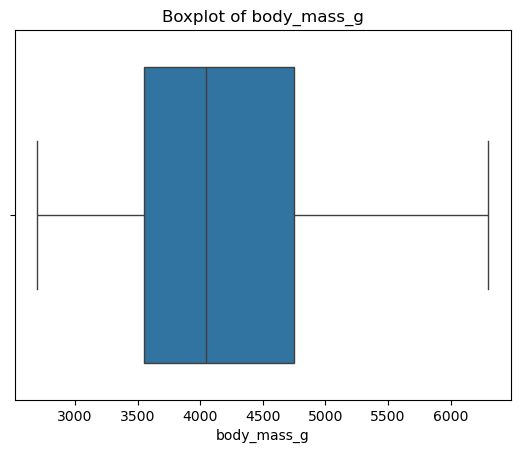

In [9]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

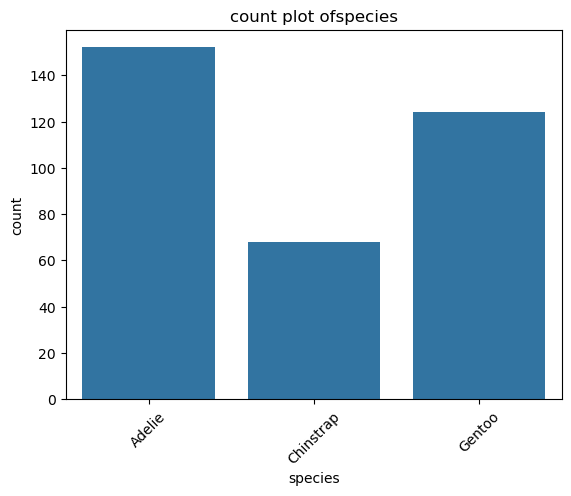

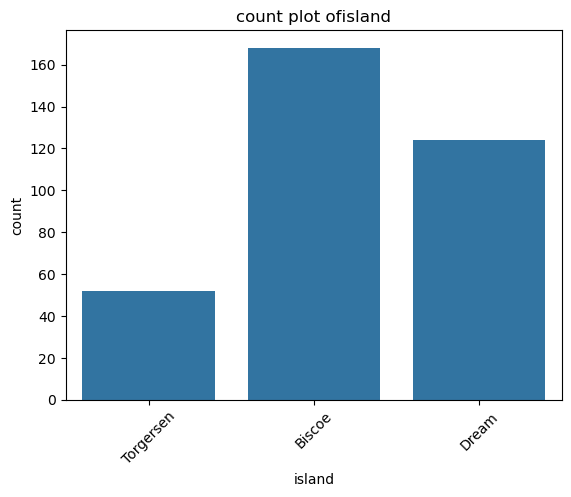

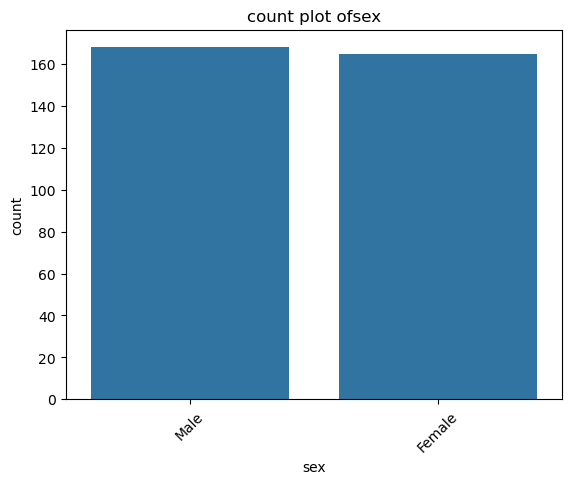

In [10]:
for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.title(f"count plot of{col}")
    plt.xticks(rotation=45)
    plt.show()

In [11]:
print("\n Skewness of Numerical Columns:")
print(df[numerical_cols].skew())


 Skewness of Numerical Columns:
bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


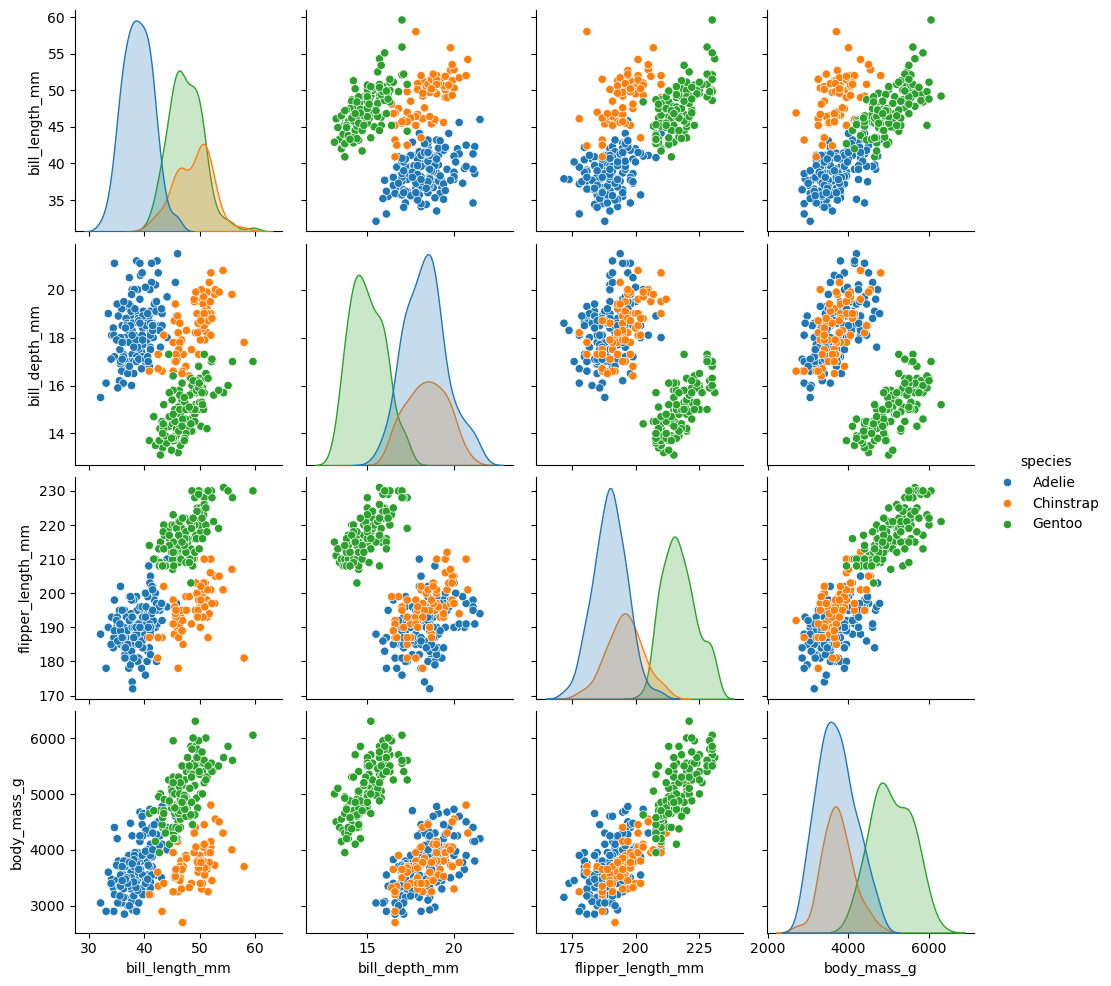

In [12]:
#BA
import matplotlib.pyplot as plt

sns.pairplot(df,hue="species")
plt.show()

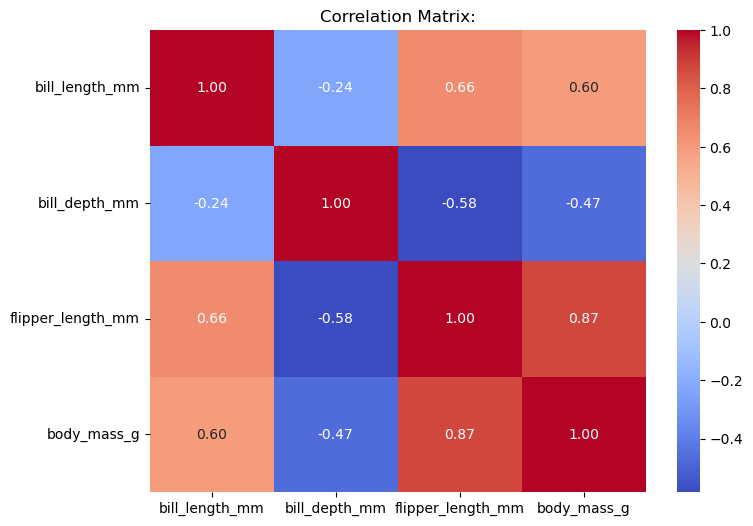

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix:")
plt.show()

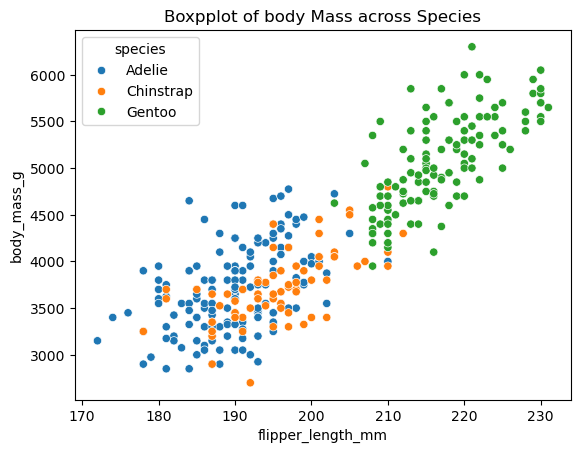

In [14]:
sns.scatterplot(x=df["flipper_length_mm"], y=df["body_mass_g"], hue=df["species"])
plt.title("Boxpplot of body Mass across Species")
plt.show()

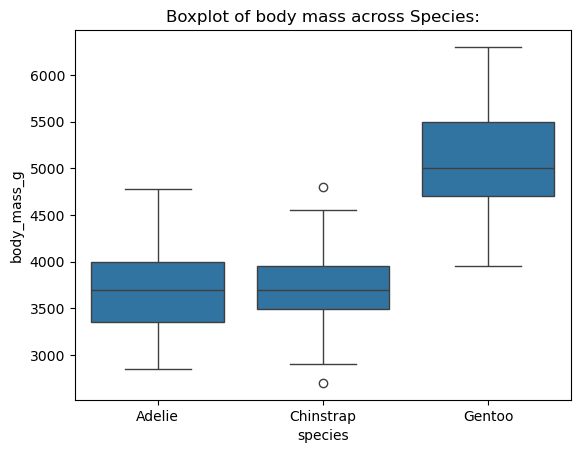

In [15]:
sns.boxplot(x=df["species"],y=df["body_mass_g"])
plt.title("Boxplot of body mass across Species:")
plt.show()

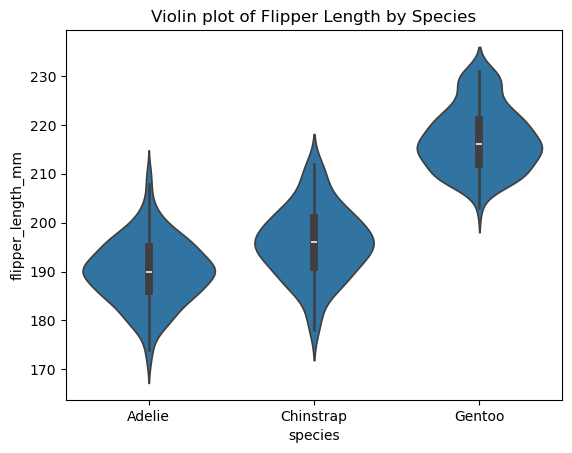

In [16]:
sns.violinplot(x=df["species"], y=df["flipper_length_mm"])
plt.title("Violin plot of Flipper Length by Species")
plt.show()

In [17]:
import pandas as pd

In [18]:
#4 t_t_s
df.dropna(inplace=True)  # Remove missing values
x = df.drop(columns=["species"])  # Feature variables
y = df["species"]  # Target variable

In [19]:
x = pd.get_dummies(x, drop_first=True) 


In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print("\n Shapes of Train_test Split:")
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")



 Shapes of Train_test Split:
x_train: (266, 7), x_test: (67, 7), y_train: (266,), y_test: (67,)


In [21]:
#Feature Scaling
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train_scaled, columns=x_train.columns)
print("\n First 5 rows of standardized data:")
print(x_train_scaled_df.head())


 First 5 rows of standardized data:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -0.593727      -1.750939           0.935943     0.539737   
1       -1.261043       0.323107          -0.719956    -1.072364   
2        1.093099      -0.638036           1.655899     1.407791   
3       -1.520555       1.031318          -0.863947    -0.514329   
4       -0.667873       0.879558          -1.511908    -0.328318   

   island_Dream  island_Torgersen  sex_Male  
0     -0.794923         -0.376339 -1.038328  
1      1.257984         -0.376339 -1.038328  
2     -0.794923         -0.376339  0.963087  
3     -0.794923         -0.376339 -1.038328  
4     -0.794923         -0.376339  0.963087  


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Define headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
}

# Define the base URL for iPhone listings on Flipkart
base_url = 'https://www.flipkart.com/search?q=iphone&page='

# Initialize a list to store extracted data
iphone_data = []

# Set the number of pages you want to scrape
num_pages = 5

for page in range(1, num_pages + 1):
    url = base_url + str(page)
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Pause to prevent overwhelming the server
    time.sleep(random.uniform(1, 3))
    
    # Extract product data
    products = soup.find_all('div', class_='_1AtVbE')  # Adjust the class based on Flipkart's HTML structure

    for product in products:
        try:
            name = product.find('div', class_='_4rR01T').text.strip()
        except AttributeError:
            name = None

        try:
            price = product.find('div', class_='_30jeq3').text.strip()
        except AttributeError:
            price = None

        try:
            rating = product.find('div', class_='_3LWZlK').text.strip()
        except AttributeError:
            rating = None

        try:
            reviews = product.find('span', class_='_2_R_DZ').text.strip()
        except AttributeError:
            reviews = None

        availability = 'Available' if price else 'Out of Stock'

        iphone_data.append({
            'Product Name': name,
            'Price': price,
            'Rating': rating,
            'Number of Reviews': reviews,
            'Availability': availability
        })

# Convert the data into a Pandas DataFrame and save as CSV
df = pd.DataFrame(iphone_data)
df.to_csv('iphones_data.csv', index=False)


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
}

# Define the base URL for iPhone listings on Flipkart
base_url = 'https://www.flipkart.com/search?q=iphone&page='

# Initialize a list to store extracted data
iphone_data = []

# Set the number of pages you want to scrape
num_pages = 5

# Function to fetch and parse a page
def fetch_page(url, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()
            return BeautifulSoup(response.content, 'html.parser')
        except requests.exceptions.HTTPError as http_err:
            logging.error(f'HTTP error occurred: {http_err}')
            break  # Break on HTTP errors like 404 or 403
        except requests.exceptions.ConnectionError as conn_err:
            logging.error(f'Connection error occurred: {conn_err}')
        except requests.exceptions.Timeout as timeout_err:
            logging.error(f'Timeout error occurred: {timeout_err}')
        except Exception as err:
            logging.error(f'An error occurred: {err}')
        retries += 1
        logging.info(f'Retrying ({retries}/{max_retries})...')
        time.sleep(2 ** retries + random.uniform(0, 1))  # Exponential backoff
    return None

# Loop through the desired number of pages
for page in range(1, num_pages + 1):
    url = base_url + str(page)
    logging.info(f'Scraping page {page}...')
    soup = fetch_page(url)
    
    if soup is None:
        logging.warning(f'Failed to retrieve page {page} after multiple attempts.')
        continue
    
    # Pause to prevent overwhelming the server
    time.sleep(random.uniform(1, 3))
    
    # Extract product data
    products = soup.find_all('div', class_='_1AtVbE')  # Adjust the class based on Flipkart's HTML structure

    for product in products:
        try:
            name = product.find('div', class_='_4rR01T').get_text(strip=True)
        except AttributeError:
            name = None

        try:
            price = product.find('div', class_='_30jeq3').get_text(strip=True)
        except AttributeError:
            price = None

        try:
            rating = product.find('div', class_='_3LWZlK').get_text(strip=True)
        except AttributeError:
            rating = None

        try:
            reviews = product.find('span', class_='_2_R_DZ').get_text(strip=True)
        except AttributeError:
            reviews = None

        availability = 'Available' if price else 'Out of Stock'

        iphone_data.append({
            'Product Name': name,
            'Price': price,
            'Rating': rating,
            'Number of Reviews': reviews,
            'Availability': availability
        })

# Convert the data into a Pandas DataFrame and save as CSV
df = pd.DataFrame(iphone_data)
df.to_csv('iphones_data.csv', index=False)


In [24]:
pip install selenium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install webdriver-manager


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time



In [28]:
# Initialize WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no browser window)
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/112.0.0.0 Safari/537.36")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# eBay iPhone Listings URL
base_url = "https://www.ebay.com/sch/i.html?_nkw=iphone&_ipg=50&_pgn="

# Function to Scrape a Single Page
def scrape_ebay(page):
    url = base_url + str(page)
    driver.get(url)
    time.sleep(5)  # Wait for page to load

    try:
        # Wait for product elements to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, 's-item'))
        )
        print(f"Page {page} loaded successfully.")
    except:
        print(f"Timeout: No products found on page {page}")
        return []

    # Find all product cards
    products = driver.find_elements(By.CLASS_NAME, 's-item')
    print(f"Found {len(products)} products on page {page}")

    data = []
    for product in products:
        # Product Name
        try:
            name = product.find_element(By.CLASS_NAME, 's-item__title').text.strip()
        except:
            name = "N/A"

        # Price
        try:
            price = product.find_element(By.CLASS_NAME, 's-item__price').text.replace("$", "").replace(",", "").strip()
        except:
            price = "0"

        # Ratings
        try:
            rating = product.find_element(By.CLASS_NAME, 'x-star-rating').get_attribute("aria-label").split(" ")[0]
        except:
            rating = "0"

        # Reviews
        try:
            review = product.find_element(By.CLASS_NAME, 's-item__reviews-count').text.strip().split(" ")[0]
        except:
            review = "0"

        # Availability
        availability = "Available" if name != "N/A" else "Unavailable"

        # Append the extracted data
        data.append({
            'Product Name': name,
            'Price': price,
            'Ratings': rating,
            'Reviews': review,
            'Availability': availability
        })
    
    return data

# Scrape Multiple Pages
all_data = []
total_pages = 3  # Set how many pages to scrape
for page in range(1, total_pages + 1):
    print(f"\nScraping page {page}...")
    page_data = scrape_ebay(page)
    all_data.extend(page_data)
    time.sleep(5)  # Delay to avoid being blocked

# Close WebDriver
driver.quit()

# Convert to DataFrame
df = pd.DataFrame(all_data)

# Handle missing data
if 'Price' not in df.columns:
    df['Price'] = "0"
if 'Ratings' not in df.columns:
    df['Ratings'] = "0"
if 'Reviews' not in df.columns:
    df['Reviews'] = "0"

# Save to CSV
df.to_csv('iphones_data.csv', index=False)
print("Data saved to iphones_data.csv")

# Convert "Price" to Numeric for EDA
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Basic EDA
print("\nSummary of Prices:")
print(df['Price'].describe())

print("\nSummary of Ratings:")
print(df['Ratings'].describe())

print("\nSummary of Reviews:")
print(df['Reviews'].describe())

2025-03-26 20:35:47,338 - INFO - ====== WebDriver manager ======
2025-03-26 20:35:50,116 - INFO - Get LATEST chromedriver version for google-chrome
2025-03-26 20:35:51,146 - INFO - Get LATEST chromedriver version for google-chrome
2025-03-26 20:35:51,942 - INFO - There is no [win64] chromedriver "134.0.6998.165" for browser google-chrome "134.0.6998" in cache
2025-03-26 20:35:51,959 - INFO - Get LATEST chromedriver version for google-chrome
2025-03-26 20:35:53,712 - INFO - WebDriver version 134.0.6998.165 selected
2025-03-26 20:35:53,717 - INFO - Modern chrome version https://storage.googleapis.com/chrome-for-testing-public/134.0.6998.165/win32/chromedriver-win32.zip
2025-03-26 20:35:53,717 - INFO - About to download new driver from https://storage.googleapis.com/chrome-for-testing-public/134.0.6998.165/win32/chromedriver-win32.zip
2025-03-26 20:35:54,610 - INFO - Driver downloading response is 200
2025-03-26 20:36:05,309 - INFO - Get LATEST chromedriver version for google-chrome
2025-


Scraping page 1...
Page 1 loaded successfully.
Found 2 products on page 1

Scraping page 2...
Page 2 loaded successfully.
Found 2 products on page 2

Scraping page 3...
Page 3 loaded successfully.
Found 2 products on page 3
Data saved to iphones_data.csv

Summary of Prices:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price, dtype: float64

Summary of Ratings:
count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Ratings, dtype: float64

Summary of Reviews:
count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Reviews, dtype: float64
